# DX 704 Week 1 Project

This week's project will build a portfolio risk and return model, and make investing recommendations for hypothetical clients.
You will collect historical data, estimate returns and risks, construct efficient frontier portfolios, and sanity check the certainty of the maximum return portfolio.

The full project description and a template notebook are available on GitHub at the following link.

https://github.com/bu-cds-dx704/dx704-project-01


Feel free to use optimization tools or libraries (such as CVXOPT or scipy.optimize) to perform any calculations required for this mini project.

### Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Collect Data

Collect historical monthly price data for the last 24 months covering 6 different stocks.
The data should cover 24 consecutive months including the last month that ended before this week's material was released on Blackboard.
To be clear, if a month ends between the Blackboard release and submitting your project, you do not need to add that month.

The six different stocks must include AAPL, SPY and TSLA.
At least one of the remaining 3 tickers must start with the same letter as your last name (e.g. professor Considine could use COIN).
This is to encourage diversity in what stocks you analyze; if you discuss this project with classmates, please make sure that you pick different tickers to differentiate your work.
Do not pick stocks with fewer than 24 consecutive months of price data.

In [78]:
# YOUR CHANGES HERE

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [21]:
# download, check
aapl = yf.download("AAPL", start="2024-01-31", end="2025-12-31", progress=False)
print(aapl.head())

tsla = yf.download("TSLA", start="2024-01-31", end="2025-12-31", progress=False)
print(tsla.head())

spy = yf.download("SPY", start="2024-01-31", end="2025-12-31", progress=False)
print(spy.head())

lulu = yf.download("LULU", start="2024-01-31", end="2025-12-31", progress=False)
print(lulu.head())

xom = yf.download("XOM", start="2024-01-31", end="2025-12-31", progress=False)
print(xom.head())

ttwo = yf.download("TTWO", start="2024-01-31", end="2025-12-31", progress=False)
print(ttwo.head())

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2024-01-31  182.674835  185.349587  182.625315  185.290136   55467800
2024-02-01  185.111801  185.200956  182.100249  182.268657   64885400
2024-02-02  184.111267  185.577417  177.573008  178.177302  102551700
2024-02-05  185.924133  187.479452  184.101351  186.389737   69668800
2024-02-06  187.528992  187.538893  185.022663  185.111817   43490800
Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2024-01-31  187.289993  193.970001  185.850006  187.000000  103221400
2024-02-01  188.860001  189.880005  184.279999  188.500000   91843300
2024-02-02  187.910004  188.690002  182.000000  185.039993  110612700
2024-02-05  181.0599

In [22]:
tickers = ["AAPL", "TSLA", "SPY", "LULU", "XOM", "TTWO"]

data = yf.download(tickers, start="2024-01-31", end="2025-12-31", progress=False)

data.head()

Price            Close                                                  \
Ticker            AAPL        LULU         SPY        TSLA        TTWO   
Date                                                                     
2024-01-31  182.674835  453.820007  471.230652  187.289993  164.929993   
2024-02-01  185.111801  461.940002  477.398193  188.860001  166.330002   
2024-02-02  184.111267  462.399994  482.423981  187.910004  167.000000   
2024-02-05  185.924133  456.730011  480.667389  181.059998  164.009995   
2024-02-06  187.528992  456.540009  482.062866  185.100006  166.669998   

Price                        High                                      ...  \
Ticker            XOM        AAPL        LULU         SPY        TSLA  ...   
Date                                                                   ...   
2024-01-31  95.899063  185.349587  473.100006  477.281061  193.970001  ...   
2024-02-01  95.507301  185.200956  463.029999  477.427468  189.880005  ...   
2024-02-02  95.115532  185.577417  464.619995  484.082951  188.690002  ...   
2024-02-05  94.723763  187.479452  459.049988  482.453257  184.679993  ...   
2024-02-06  95.376709  187.538893  459.660004  482.394660  186.490005  ...   

Price             Open                                        Volume           \
Ticker             SPY        TSLA        TTWO        XOM       AAPL     LULU   
Date                                                                            
2024-01-31  476.832166  187.000000  165.339996  97.699328   55467800  2879200   
2024-02-01  472.938436  188.500000  164.570007  96.607982   64885400  1526200   
2024-02-02  477.837355  185.039993  166.529999  96.775878  102551700  1144200   
2024-02-05  481.789669  184.259995  165.720001  94.630479   69668800  1166100   
2024-02-06  481.613942  177.210007  164.350006  95.208808   43490800  1531000   

Price                                                
Ticker            SPY       TSLA     TTWO       XOM  
Date                                                 
2024-01-31  126011100  103221400  1078800  22415300  
2024-02-01   91891600   91843300  1105500  19240700  
2024-02-02   99228200  110612700  1120900  21973400  
2024-02-05   75757100  134294400  1530300  17190900  
2024-02-06   55918600  122676000   925000  13347900  

[5 rows x 30 columns]

In [34]:
data = yf.download(tickers, start="2024-01-31", end="2025-12-31", auto_adjust=False, group_by="column")


[*********************100%***********************]  6 of 6 completed


Save the data as a TSV file named "historical_prices.tsv" and include a header row with the column names "date" and the 6 stock ticker symbols.
The date should be the last trading day of the month, so it may not be the last day of the month.
For example, the last trading day of November 2024 was 2024-11-29.
The remaining columns should contain the adjusted closing prices of the corresponding stock tickers on that day.


In [39]:
# YOUR CHANGES HERE

# adjusted close
adj_close = data["Adj Close"]

# resample to get last trading day
historical_prices = adj_close.resample("ME").last()

# reset index / clean
historical_prices.index.name = "date"
historical_prices.reset_index(inplace=True)
historical_prices.columns.name = None

# save to tsv
historical_prices.to_csv("historical_prices.tsv", sep="\t", index=False)

historical_prices.head()

,date,AAPL,LULU,SPY,TSLA,TTWO,XOM
0,2024-01-31,182.674835,453.820007,471.230652,187.289993,164.929993,95.899063
1,2024-02-29,179.287476,467.089996,495.822723,201.880005,146.929993,98.400200
2,2024-03-31,170.092453,390.649994,512.037109,175.789993,148.490005,109.433960
3,2024-04-30,168.951767,360.600006,491.391907,183.279999,142.809998,111.345108
4,2024-05-31,190.953079,311.989990,516.246399,178.080002,160.360001,111.290916


Submit "historical_prices.tsv" in Gradescope.

## Part 2: Calculate Historical Asset Returns

Calculate the historical asset returns based on the price data that you previously collected.

In [41]:
# YOUR CHANGES HERE

# copy
returns = historical_prices.copy()

# index
returns.set_index("date", inplace=True)

# calculate
returns = returns.pct_change()

# date
returns.reset_index(inplace=True)

returns.head()

,date,AAPL,LULU,SPY,TSLA,TTWO,XOM
0,2024-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-02-29,-0.018543,0.029241,0.052187,0.077901,-0.109137,0.026081
2,2024-03-31,-0.051286,-0.163652,0.032702,-0.129235,0.010617,0.112131
3,2024-04-30,-0.006706,-0.076923,-0.040320,0.042608,-0.038252,0.017464
4,2024-05-31,0.130222,-0.134803,0.050580,-0.028372,0.122891,-0.000487


In [43]:
returns.shape

(24, 7)

Save the data as a TSV file named "historical_returns.tsv" and include a header row with the column names "date" and the 6 stock ticker symbols.
Each row should have the date at the end of the month and the corresponding *relative* price changes.
For example, if the previous price was \$100 and the new price is \$110, the return value should be 0.10.
There should only be 23 rows of data in this file, since they are computed as the differences of 24 prices.

In [45]:
# YOUR CHANGES HERE

# drop nan row

returns = returns.dropna().copy()

# save file

returns.to_csv("historical_returns.tsv", sep="\t", index=False)

Submit "historical_returns.tsv" in Gradescope.

## Part 3: Estimate Returns

Estimate the expected returns for each asset using the previously calculated return data.
Just compute the average (mean) return for each asset over your data set; do not use other estimators that have been mentioned.
This will serve as your estimate of expected return for each asset.

In [47]:
# YOUR CHANGES HERE


est_returns = returns.set_index("date")

est_returns = est_returns.mean()

est_returns


AAPL    0.019260
LULU   -0.025045
SPY     0.016991
TSLA    0.050116
TTWO    0.022263
XOM     0.011225
dtype: float64

Save the estimated returns in a TSV file named "estimated_returns.tsv" and include a header row with the column names "asset" and "estimated_return".

In [50]:
# YOUR CHANGES HERE

# change df for header row
est_returns_df = est_returns.reset_index()  

# rename 
est_returns_df.columns = ["asset", "estimated_return"]

# save as TSV
est_returns_df.to_csv("estimated_returns.tsv", sep="\t", index=False)

# check
est_returns_df.head()


,asset,estimated_return
0,AAPL,0.019260
1,LULU,-0.025045
2,SPY,0.016991
3,TSLA,0.050116
4,TTWO,0.022263


Submit "estimated_returns.tsv" in Gradescope.

## Part 4: Estimate Risk

Estimate the covariance matrix for the asset returns to understand how the assets move together.

In [51]:
# YOUR CHANGES HERE

# remove date 
returns_no_date = returns.set_index("date")

# compute
cov_matrix = returns_no_date.cov()

cov_matrix


,AAPL,LULU,SPY,TSLA,TTWO,XOM
AAPL,0.003477,-0.000653,0.000554,0.002525,0.001164,-0.000370
LULU,-0.000653,0.015634,0.000289,0.007923,-0.001108,-0.002838
SPY,0.000554,0.000289,0.000975,0.001733,0.000287,0.000102
TSLA,0.002525,0.007923,0.001733,0.023769,-0.000057,-0.003348
TTWO,0.001164,-0.001108,0.000287,-0.000057,0.005690,-0.000392
XOM,-0.000370,-0.002838,0.000102,-0.003348,-0.000392,0.002205


Save the estimated covariances to a TSV file named "estimated_covariance.tsv".
The header row should have a blank column name followed by the names of the assets.
Each data row should start with the name of an asset for that row, and be followed by the individual covariances corresponding to that row and column's assets.
(This is the format of pandas's `to_csv` method with `sep="\t"` when used on a covariance matrix as computed in the examples.)

In [55]:
# YOUR CHANGES HERE

cov_matrix.to_csv("estimated_covariance.tsv", sep="\t")


Submit "estimated_covariance.tsv" in Gradescope.

## Part 5: Construct the Maximum Return Portfolio

Compute the maximum return portfolio based on your previously estimated risks and returns.

In [62]:
# YOUR CHANGES HERE

import cvxpy as cp

n = len(est_returns)

x = cp.Variable(n)

objective = cp.Maximize(est_returns.to_numpy().reshape(1, -1) @ x)
objective

Maximize(Expression(AFFINE, UNKNOWN, (1,)))

In [63]:
prob = cp.Problem(objective, [0 <= x, cp.sum(x) ==1])

In [64]:
est_returns_P = prob.solve()
est_returns_P

0.05011591649582723

In [65]:
x.value

array([5.75284047e-10, 7.37938522e-10, 8.08223780e-10, 9.99999997e-01,
       7.59914649e-11, 1.08349394e-09])

In [66]:
x.value.round(2)

array([0., 0., 0., 1., 0., 0.])

Save the maximum return portfolio in a TSV file named "maximum_return.tsv".
The header row should have two columns, "asset" and "allocation".
The allocation values should sum up to one.


In [67]:
# YOUR CHANGES HERE

# weights clean
weights = x.value.round(6)

# format header
max_return_portfolio = pd.DataFrame({
    "asset": est_returns.index,
    "allocation": weights
})

# save
max_return_portfolio.to_csv("maximum_return.tsv", sep="\t", index=False)

max_return_portfolio

,asset,allocation
0,AAPL,0.0
1,LULU,0.0
2,SPY,0.0
3,TSLA,1.0
4,TTWO,0.0
5,XOM,0.0


Submit "maximum_return.tsv" in Gradescope.

## Part 6: Construct the Minimum Risk Portfolio

Compute the minimum risk portfolio based on your previously estimated risks.

In [70]:
# YOUR CHANGES HERE

x_minimum_risk = cp.Variable(n)

objective_minimum_risk = cp.Minimize(x_minimum_risk.T@ cov_matrix.to_numpy() @ x_minimum_risk)
objective_minimum_risk

prob_minimum_risk = cp.Problem(objective_minimum_risk, [0 <= x_minimum_risk, cp.sum(x_minimum_risk) ==1])

covariance_minimum_risk = prob_minimum_risk.solve()
covariance_minimum_risk


np.float64(0.00047599986013658664)

In [72]:
x_minimum_risk.value.round(2)

array([0.11, 0.1 , 0.32, 0.  , 0.09, 0.37])

In [73]:
estimated_return_minimum_risk = x_minimum_risk.value @ est_returns
estimated_return_minimum_risk 

np.float64(0.011439956708414849)

Save the minimum risk portfolio in a TSV file named "minimum_risk.tsv".
The header row should have two columns, "asset" and "allocation".
The allocation values should sum up to one.


In [74]:
# YOUR CHANGES HERE

# clean 
min_risk_weights = x_minimum_risk.value.round(6)

# reformat
min_risk_portfolio = pd.DataFrame({
    "asset": est_returns.index,
    "allocation": min_risk_weights
})


min_risk_portfolio.to_csv("minimum_risk.tsv", sep="\t", index=False)

min_risk_portfolio

,asset,allocation
0,AAPL,0.111198
1,LULU,0.101089
2,SPY,0.323866
3,TSLA,0.003323
4,TTWO,0.089840
5,XOM,0.370684


Submit "minimum_risk.tsv" in Gradescope.

## Part 7: Build Efficient Frontier Portfolios

Compute 101 portfolios along the mean-variance efficient frontier with evenly spaced estimated returns.
The first portfolio should be the minimum risk portfolio from part 4, and the last portfolio should be the maximum return portfolio from part 3.
The estimated return of each portfolio should be higher than the previous by one percent of the difference between the first and last portfolios.
That is, the estimated return of the portfolios should be similar to `np.linspace(min_risk_return, max_return, 101)`.


In [ ]:
# YOUR CHANGES HERE

# number of assets
n = len(est_returns)

# convert to numpy
mu = est_returns.to_numpy()                
Sigma = cov_matrix.to_numpy()           

# estimated_return_minimum_risk earlier)
estimated_return_maximum_return = est_returns.max()

# lists 
ef_variances = []
ef_returns = []
ef_portfolios = []

# 101 targets
for r in np.linspace(estimated_return_minimum_risk, estimated_return_maximum_return, 101):

    x_r = cp.Variable(n)

    
    objective = cp.Minimize(cp.quad_form(x_r, Sigma))

    constraints = [
        x_r >= 0,
        cp.sum(x_r) == 1,
        mu @ x_r == r          
        
    ]

    prob_r = cp.Problem(objective, constraints)
    var_val = prob_r.solve()

    ef_variances.append(var_val)
    ef_returns.append(r)
    ef_portfolios.append(x_r.value)

ef_variances = np.array(ef_variances)
ef_returns = np.array(ef_returns)
ef_portfolios = np.array(ef_portfolios)


print("Portfolios:", ef_portfolios.shape)  
print("First target return:", ef_returns[0], "Last:", ef_returns[-1])
print("Sum weights first:", ef_portfolios[0].sum(), "last:", ef_portfolios[-1].sum())


Portfolios: (101, 6)
First target return: 0.011439956708414849 Last: 0.05011591664007055
Sum weights first: 1.0 last: 1.000000001777111


/usr/local/python/3.12.1/lib/python3.12/site-packages/pandas/core/internals/blocks.py:347: RuntimeWarning: invalid value encountered in sqrt
  result = func(self.values, **kwargs)


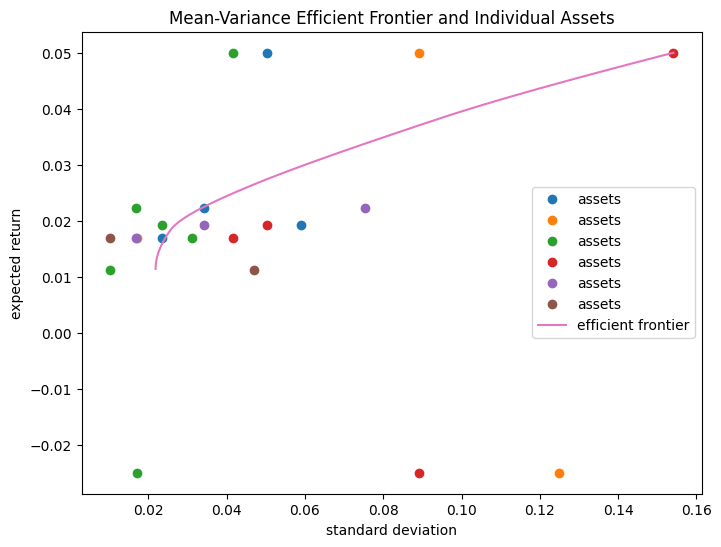

In [ ]:
# check plot eff

plt.figure(figsize=(8,6))

# individual assets
plt.plot(
    np.sqrt(cov_matrix), 
    est_returns, 
    linestyle="none", 
    marker="o", 
    label="assets"
)

# efficient frontier
plt.plot(
    np.sqrt(ef_variances), 
    ef_returns, 
    linestyle="-", 
    label="efficient frontier"
)

plt.xlabel("standard deviation")
plt.ylabel("expected return")
plt.title("Mean-Variance Efficient Frontier and Individual Assets")
plt.legend()

plt.show()


Save the portfolios in a TSV file named "efficient_frontier.tsv".
The header row should have columns "index", "return", "risk", and all the asset tickers.
Each data row should have the portfolio index (0-100), the estimated return of the portfolio, the estimated standard deviation (not variance) of the portfolio, and all the asset allocations (which should sum to one).

In [ ]:
# YOUR CHANGES HERE

assets = list(est_returns.index) 
ef_df = pd.DataFrame(ef_portfolios, columns=assets)

# columns
ef_df.insert(0, "risk", np.sqrt(ef_variances))  
ef_df.insert(0, "return", ef_returns)
ef_df.insert(0, "index", np.arange(len(ef_df)))  

# check weight
print("Max weight sum error:", np.max(np.abs(ef_df[assets].sum(axis=1) - 1)))

# Save to TSV
ef_df.to_csv("efficient_frontier.tsv", sep="\t", index=False)

ef_df.head()


Max weight sum error: 1.7771109028785759e-09


,index,return,risk,AAPL,LULU,SPY,TSLA,TTWO,XOM
0,0,0.011440,0.021817,0.111198,0.101089,0.323866,0.003323,0.089840,0.370684
1,1,0.011827,0.021830,0.109118,0.095368,0.327539,0.007307,0.091642,0.369027
2,2,0.012213,0.021869,0.107038,0.089647,0.331212,0.011290,0.093443,0.367369
3,3,0.012600,0.021932,0.104958,0.083927,0.334885,0.015273,0.095245,0.365712
4,4,0.012987,0.022021,0.102878,0.078206,0.338558,0.019256,0.097047,0.364054


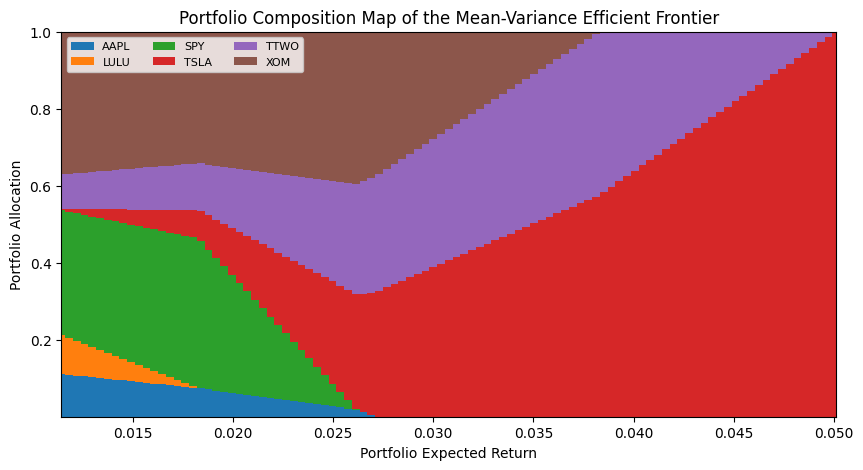

In [84]:

#chart from class 

plt.figure(figsize=(10, 5))

# Start stacking from zero
bottom = np.zeros(len(ef_returns))

assets = list(est_returns.index)  # ticker names

# Draw stacked bars
for i, a in enumerate(assets):
    plt.bar(
        x=ef_returns,
        height=ef_portfolios[:, i],
        bottom=bottom,
        label=a,
        width=(ef_returns[1] - ef_returns[0])
    )
    bottom += ef_portfolios[:, i]

plt.legend(ncol=3, fontsize=8)
plt.xlabel("Portfolio Expected Return")
plt.xlim(estimated_return_minimum_risk, estimated_return_maximum_return)
plt.ylabel("Portfolio Allocation")
plt.title("Portfolio Composition Map of the Mean-Variance Efficient Frontier")

plt.show()


Submit "efficient_frontier.tsv" in Gradescope.

## Part 8: Check Maximum Return Portfolio Stability

Check the stability of the maximum return portfolio by resampling the estimated risk/return model.

Repeat 1000 times -
1. Use `np.random.multivariate_normal` to generate 23 return samples using your previously estimated risks and returns.
2. Estimate the return of each asset using that resampled return history.
3. Check which asset had the highest return in those resampled estimates.

This procedure is a reduced and simplified version of the Michaud resampled efficient frontier procedure that takes uncertainty in the risk model into account.

In [87]:
# YOUR CHANGES HERE

# config
assets = list(est_returns.index)
mu = est_returns.to_numpy()
Sigma = cov_matrix.to_numpy()

n = len(assets)

winner_indices = []   

# generate sim
for i in range(1000):

    # 23
    sim_returns = np.random.multivariate_normal(mu, Sigma, 23)

    
    sim_means = sim_returns.mean(axis=0)

    # record
    winner = np.argmax(sim_means)
    winner_indices.append(winner)

# convert 
counts = np.bincount(winner_indices, minlength=n)
probabilities = counts / 1000

results_df = pd.DataFrame({
    "asset": assets,
    "probability": probabilities
})

results_df


,asset,probability
0,AAPL,0.043
1,LULU,0.004
2,SPY,0.009
3,TSLA,0.740
4,TTWO,0.152
5,XOM,0.052


Save a file "max_return_probabilities.tsv" with the distribution of highest return assets.
The header row should have columns "asset" and "probability".
There should be a data row for each asset and its sample probability of having the highest return based on those 1000 resampled estimates.


In [88]:
# YOUR CHANGES HERE

results_df.to_csv("max_return_probabilities.tsv", sep="\t", index=False)

results_df


,asset,probability
0,AAPL,0.043
1,LULU,0.004
2,SPY,0.009
3,TSLA,0.740
4,TTWO,0.152
5,XOM,0.052


Submit "max_return_probabilities.tsv" in Gradescope.

## Part 9: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgments are appropriate, just write none in the file.


Submit "acknowledgments.txt" in Gradescope.

In [90]:
ack_text = """Acknowledgments

Primarily used Class Videos to references code along with provided materials in git. I didn't work with anybody else. ChatGPT was used to help with quetsions 7 and 8 and for charting; also used to troubleshoot with multiindex and some functions. ChatGPT model was 5.2 with link https://chatgpt.com/c/69766810-0440-8328-82a9-23bae39db80f
"""

with open("acknowledgments.txt", "w") as f:
    f.write(ack_text)

print("acknowledgments.txt created.")


acknowledgments.txt created.


## Part 10: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.
You do not need to provide code for data collection if you did that by manually.

Submit "project.ipynb" in Gradescope.